Al igual que hicimos con el dataset anterior, realizamos analisis de dataset que posee el precio

In [4]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt
import psycopg2

In [5]:
def connect_postgres():
         
    connection = psycopg2.connect(
        database="Soccer",
        user="postgres",
        password="Ronny1212",
        host="localhost",
        port=5432
    )
    return connection
    print("Database connection ok")

Hicimos la revision de las columnas del dataset, de las cuales solo 2 son tipo 'int', el resto son 'varchar', la columna value se toma como varchar ya que posee signos y el denominador de cantidad (miles, millones), es muy probable que esta columna sea modificada mas adelante

In [35]:
connection = connect_postgres()
cursor = connection.cursor()
cursor.execute("""SELECT * FROM playervalue""")
connection.commit()
resultados = cursor.fetchall()
df = pd.DataFrame(resultados)
df.columns=['Rk','Name','Age','Value','Team','Nationality','Position']
print(df.head())



   Rk           Name  Age    Value               Team  Nationality  \
0   0        Ederson   29  €45.00m   Manchester City        Brazil   
1   1  Stefan Ortega   30   €6.00m   Manchester City       Germany   
2   2   Scott Carson   37    €250k   Manchester City       England   
3   3     Rúben Dias   25  €75.00m   Manchester City      Portugal   
4   4     Nathan Aké   28  €35.00m   Manchester City   Netherlands   

      Position  
0   Goalkeeper  
1   Goalkeeper  
2   Goalkeeper  
3  Centre-Back  
4  Centre-Back  


In [36]:
df.dtypes

Rk              int64
Name           object
Age             int64
Value          object
Team           object
Nationality    object
Position       object
dtype: object

In [37]:
df.dtypes.value_counts()

object    5
int64     2
dtype: int64

In [38]:
df.isnull().any()

Rk             False
Name           False
Age            False
Value          False
Team           False
Nationality    False
Position       False
dtype: bool

In [46]:
df.dtypes.value_counts()

object    5
int64     2
dtype: int64

In [39]:
df.describe(include="object") 

,Name,Value,Team,Nationality,Position
count,11049,11049,11049,11049,11049
unique,10963,125,401,137,16
top,Paulinho,€300k,Varbergs BoIS,France,Centre-Back
freq,4,709,42,515,1911


In [41]:
df.describe(include="int64")["Age"]

count    11049.000000
mean        25.480315
std          4.805447
min         15.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         47.000000
Name: Age, dtype: float64

Al igual que el anterior este dataset posee la informacion referente a la posicion de los jugadores.

In [42]:
df['Position'].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Centre-Forward', 'Second Striker',
       'Left Midfield', 'Right Midfield', 'midfield', 'Attack',
       'Defender'], dtype=object)

In [43]:
df['Nationality'].unique()

array(['Brazil', 'Germany', 'England', 'Portugal', 'Netherlands', 'Spain',
       'Switzerland', 'France', 'Argentina', 'Belgium', 'Algeria',
       'Norway', 'Senegal', 'United States', 'Croatia', 'Ukraine',
       'Morocco', 'Albania', "Cote d'Ivoire", 'Gabon', 'Poland',
       'Scotland', 'Japan', 'Ghana', 'Italy', 'Egypt', 'Ireland',
       'Cameroon', 'Greece', 'Guinea', 'Colombia', 'Uruguay', 'Sweden',
       'Denmark', 'Austria', 'Iraq', 'Wales', 'Mali', 'Korea, South',
       'Slovakia', 'Northern Ireland', 'Paraguay', 'Czech Republic',
       'Jamaica', 'Turkey', 'Australia', 'Nigeria', 'Zambia', 'Finland',
       'Burkina Faso', 'Mexico', 'Ecuador', 'Bosnia-Herzegovina',
       'Costa Rica', 'New Zealand', 'Montserrat', 'Grenada', 'Iran',
       'DR Congo', 'Dominican Republic', 'Serbia', 'Israel', 'Zimbabwe',
       'Slovenia', 'Montenegro', 'Mozambique', 'Central African Republic',
       'Chile', 'Georgia', 'Guadeloupe', 'Peru', 'Togo', 'Venezuela',
       'North Macedonia

Y hicimos el analisis de la edad de los jugadores, por lo que se puede concluir que en ambos dataset existe un alto numero de jugadores que estan entre los 23 y 27 años

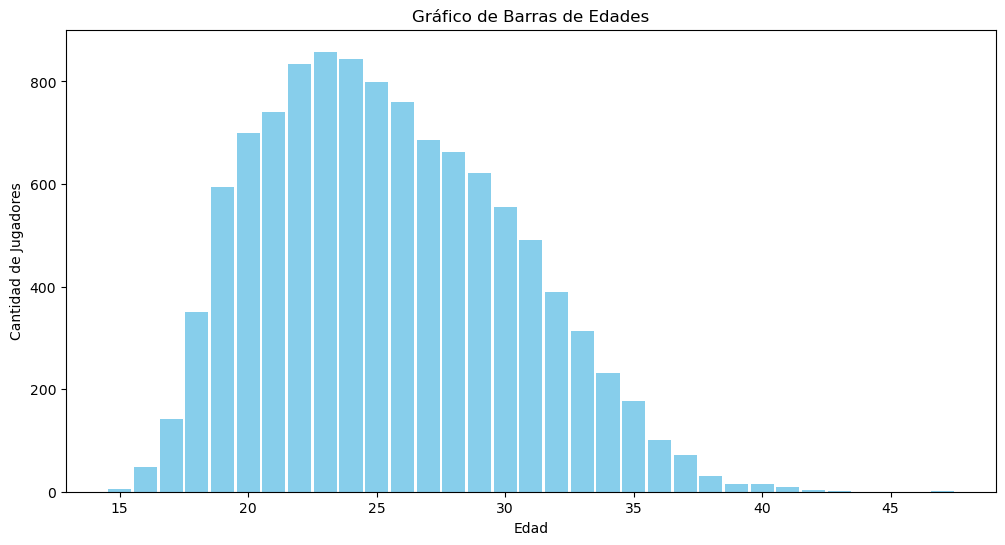

In [45]:
age_counts = df['Age'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, width=0.9, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Jugadores')
plt.title('Gráfico de Barras de Edades')
plt.show()